In [1]:
import numpy as np
import scipy as sp
import math as m
from prettytable import PrettyTable
from Library_asgn2 import read_matrices
mat_list = read_matrices('input_matrices.txt',delimiter=',')

<hr>
<h2> <b>Question 1</b> </h2>


In [2]:
from Library_asgn2 import Cholesky_solve, check_symmetry,print_matrix,Gauss_seidel_solve

A = mat_list[0]
B = mat_list[1]

q1_flag = check_symmetry(A)
if q1_flag == True:
    print("A is a symmetric Matrix,So we can proceed with Cholesky Decomposition and Gauss Seidel Method")
else:
    raise ValueError("A is not a symmetric Matrix")

A1 = np.copy(A).tolist()    # We need to make a copy of A as Cholesky
B1 = np.copy(B).tolist()    # Decomposition modifies the matrix A and B
Y_cholesky_q1 = Cholesky_solve(A1,B)

tolerence_q1 = 1e-6
Y_GS_q1,steps_q1 = Gauss_seidel_solve(A,B,tolerence_q1) 

print("The solution of the syatem of the linear equations are tabluated below:\n")
p=PrettyTable()
p.field_names = ["Variable", "Cholesky", "Gauss Seidel"]

for i in range(len(Y_cholesky_q1)):
    p.add_row([f"x_{i+1}","{:.6f}".format(Y_cholesky_q1[i][0]),"{:.6f}".format(Y_GS_q1[i][0])])
print(p)
print("The Number of Iterations for Gauss Seidel Method is: ",steps_q1)
del A,A1,B,B1,Y_cholesky_q1,Y_GS_q1,steps_q1,p,q1_flag,tolerence_q1
del Cholesky_solve,check_symmetry,print_matrix,Gauss_seidel_solve

A is a symmetric Matrix,So we can proceed with Cholesky Decomposition and Gauss Seidel Method
The solution of the syatem of the linear equations are tabluated below:

+----------+----------+--------------+
| Variable | Cholesky | Gauss Seidel |
+----------+----------+--------------+
|   x_1    | 1.000000 |   1.000000   |
|   x_2    | 1.000000 |   1.000000   |
|   x_3    | 1.000000 |   1.000000   |
|   x_4    | 1.000000 |   1.000000   |
|   x_5    | 1.000000 |   1.000000   |
|   x_6    | 1.000000 |   1.000000   |
+----------+----------+--------------+
The Number of Iterations for Gauss Seidel Method is:  16


<hr>
<h2> <b> Question 2 </b> </h2>


In [3]:
from Library_asgn2 import gauss_jordan_solve,LU_Solve_eqn
A = mat_list[2]
B = mat_list[3]
Y_GJ_qn2 = gauss_jordan_solve(np.copy(A).tolist(),np.copy(B).tolist())
Y_LU_qn2 = LU_Solve_eqn(np.copy(A).tolist(),np.copy(B).tolist())
p=PrettyTable()
p.field_names = ["Variable", "Gauss Jordan", "LU Decomposition"]
for i in range(len(Y_GJ_qn2)):
    p.add_row([f"x_{i+1}","{:.4f}".format(Y_GJ_qn2[i][0]),"{:.4f}".format(Y_LU_qn2[i][0])])
print("The solution of the syatem of the linear equations are tabluated below:\n")    
print(p)
del A,B,Y_GJ_qn2,Y_LU_qn2,p
del gauss_jordan_solve,LU_Solve_eqn

The solution of the syatem of the linear equations are tabluated below:

+----------+--------------+------------------+
| Variable | Gauss Jordan | LU Decomposition |
+----------+--------------+------------------+
|   x_1    |    2.6746    |      2.6746      |
|   x_2    |    3.7119    |      3.7119      |
|   x_3    |   -0.0533    |     -0.0533      |
|   x_4    |   -0.0744    |     -0.0744      |
|   x_5    |    5.2591    |      5.2591      |
+----------+--------------+------------------+


<hr>
<h2> <b> Question 3 </b> </h2>


In [4]:
from Library_asgn2 import conjugate_gradient_solve,print_matrix
A = np.copy(mat_list[4]).tolist()
B = np.copy(mat_list[5]).tolist()
Y_CG_qn3,steps_qn3 = conjugate_gradient_solve(A,B,[[0],[0],[0],[0],[0],[0]],1e-6)
print("The Number of Iterations for Conjugate Gradient Method is",steps_qn3,"which is same as the length of the A")
p=PrettyTable()
p.field_names = ["Variable", "Solution"]
for i in range(len(Y_CG_qn3)):
    p.add_row([f"x_{i+1}","{:.4f}".format(Y_CG_qn3[i][0])])
print("The solution of the syatem of the linear equations are tabluated below:\n")
print(p)

The Number of Iterations for Conjugate Gradient Method is 6 which is same as the length of the A
The solution of the syatem of the linear equations are tabluated below:

+----------+----------+
| Variable | Solution |
+----------+----------+
|   x_1    | -0.7245  |
|   x_2    |  0.2177  |
|   x_3    |  0.9666  |
|   x_4    | -0.6857  |
|   x_5    | -0.0382  |
|   x_6    |  0.6488  |
+----------+----------+


<p> Inorder to find the inverse of the matrix A using conjugate gradient Method, we need to set the matrix B as Identity matrix, the guess used here is a matrix with all the elements 1 </p>

In [5]:
B = np.eye(6).tolist()
guess = np.ones((6,1)).tolist()
print("The matrix A is shown below:\n")
print(np.array(A))
print("\n")
A_inv,steps_qn3 = conjugate_gradient_solve(A,B,guess,1e-6)
print("The Number of Iterations for Conjugate Gradient Method is",steps_qn3,"which is same as the length of the A")
print("The inverse of the Matrix A is shown below:\n")
print(np.round(A_inv,4))
print("\n")
print("For the verification of the result the product of A and A_inv is shown below:\n")
print(np.round(np.matmul(A,A_inv)))
del A,B,Y_CG_qn3,steps_qn3,p,guess,A_inv,conjugate_gradient_solve,print_matrix
del mat_list


The matrix A is shown below:

[[ 2. -1.  0.  0.  0.  0.]
 [-1.  4. -1.  0. -1.  0.]
 [ 0. -1.  4.  0.  0. -1.]
 [ 0.  0.  0.  2. -1.  0.]
 [ 0. -1.  0. -1.  4. -1.]
 [ 0.  0. -1.  0. -1.  4.]]


The Number of Iterations for Conjugate Gradient Method is 6 which is same as the length of the A
The inverse of the Matrix A is shown below:

[[0.5868 0.1735 0.0501 0.0286 0.0572 0.0268]
 [0.1735 0.347  0.1002 0.0572 0.1145 0.0537]
 [0.0501 0.1002 0.297  0.0268 0.0537 0.0877]
 [0.0286 0.0572 0.0268 0.5868 0.1735 0.0501]
 [0.0572 0.1145 0.0537 0.1735 0.347  0.1002]
 [0.0268 0.0537 0.0877 0.0501 0.1002 0.297 ]]


For the verification of the result the product of A and A_inv is shown below:

[[ 1.  0. -0. -0.  0. -0.]
 [-0.  1.  0. -0. -0. -0.]
 [-0. -0.  1.  0.  0.  0.]
 [-0.  0. -0.  1.  0. -0.]
 [-0. -0. -0. -0.  1.  0.]
 [-0.  0. -0.  0.  0.  1.]]


We can see that the inverse of A is given by the matrix A_inv as their product is the identity matrix.

<hr>
<h2> <b> Question 4 </b> </h2>

In [10]:
def Kronecker_delta(i, j):
    if i == j:
        return 1
    else:
        return 0
n=50

def A_ij(i, j):
    m = 0.2 
    num = 0.5 * (Kronecker_delta(i + 1, j) + Kronecker_delta(i - 1, j) - 2 * Kronecker_delta(i, j)) + m*m *Kronecker_delta(i, j)
    return num if not ((i == 0 and j == n-1) or (i == n-1 and j == 0)) else 0.5
def matrix_multiply_fn_with_matrix(A_ij, B):
    rows_A = len(B)
    cols_A = len(B[0])

    result = []
    for i in range(rows_A):
        row = []
        for j in range(cols_A):
            element = sum(A_ij(i, k) * B[k][j] for k in range(len(B)))
            row.append(element)
        result.append(row)

    return result
def conjugate_gradient_solve(A: callable,B: list,guess: list,T: float,n: int):
    x0=guess
    r0 = np.add(B, -1 * np.array(matrix_multiply_fn_with_matrix(A, x0)))
    d0 = np.copy(r0)
    i=1
    reslist = [np.linalg.norm(r0)]
    while True:
        alpha1 = np.matmul(np.transpose(r0), r0) / np.matmul(np.transpose(d0), np.array(matrix_multiply_fn_with_matrix(A, d0)))
        x1 = np.add(x0, alpha1[0][0]*d0)
        r1 = np.add(r0, -1 * alpha1[0][0] * np.array(matrix_multiply_fn_with_matrix(A, d0)))
        reslist.append(np.linalg.norm(r1))
        if np.linalg.norm(r1) < T and i<=n:
            return x1.tolist(),reslist,i
        elif i>n:
            print("Maybe the matrix A dosent satisfy the conditions for the Conjugate Gradient Method")
            return None
        else: 
            beta1 = np.matmul(np.transpose(r1), r1) / np.matmul(np.transpose(r0), r0)
            d1 = np.add(r1, beta1[0][0] * d0)
            x0 = x1
            del x1
            r0 = r1
            del r1
            d0 = d1
            del d1
            i+=1
n=50
inv,res,iter = conjugate_gradient_solve(A_ij,np.eye(50).tolist(),[[1] for i in range(50)],1e-6,50)
print("The inverse of the Matrix A is shown below:\n")
print(np.array(inv))
print("\n")
print("The Number of Iterations for Conjugate Gradient Method is",iter,"which is same as the length of the A")
print("The product of A and A_inv is shown below:\n")
print(np.round(matrix_multiply_fn_with_matrix(A_ij,inv)))
# The Matrix is saved in a file
np.savetxt('Q4-A_inv.txt',np.round(np.array(inv),6),delimiter='\t',fmt='%1.6f')
print("\n")
print("The inverse of the Matrix A is saved in the file Q4-A_inv.txt")

The inverse of the Matrix A is shown below:

[[3.38855294 4.25301082 4.77722784 ... 4.91926663 4.77722784 4.25301082]
 [4.25301082 3.38855294 4.25301082 ... 4.66776409 4.91926663 4.77722784]
 [4.77722784 4.25301082 3.38855294 ... 4.04284042 4.66776409 4.91926663]
 ...
 [4.91926663 4.66776409 4.04284042 ... 3.38855294 4.25301082 4.77722784]
 [4.77722784 4.91926663 4.66776409 ... 4.25301082 3.38855294 4.25301082]
 [4.25301082 4.77722784 4.91926663 ... 4.77722784 4.25301082 3.38855294]]


The Number of Iterations for Conjugate Gradient Method is 26 which is same as the length of the A
The product of A and A_inv is shown below:

[[ 1. -0.  0. ...  0. -0. -0.]
 [-0.  1. -0. ... -0.  0. -0.]
 [-0. -0.  1. ... -0. -0. -0.]
 ...
 [-0. -0. -0. ...  1. -0.  0.]
 [-0. -0. -0. ... -0.  1. -0.]
 [-0. -0. -0. ...  0. -0.  1.]]


The inverse of the Matrix A is saved in the file Q4-A_inv.txt


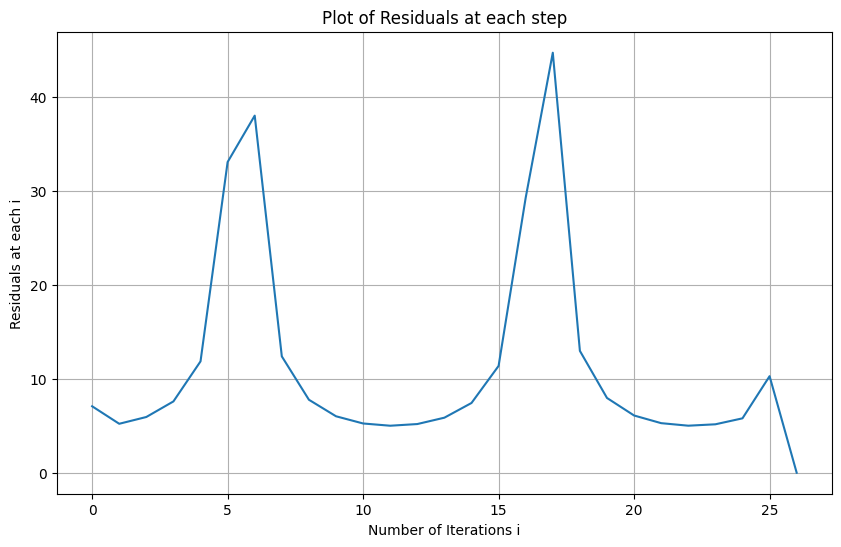

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot([i for i in range(iter+1)],res)
plt.xlabel("Number of Iterations i")
plt.ylabel("Residuals at each i")
plt.title("Plot of Residuals at each step")
plt.grid()
plt.show()